In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [51]:
df=pd.read_csv('wallmart.csv')


In [52]:
print(df.dtypes)

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object


In [53]:
df.shape

(550068, 10)

In [54]:
df.isnull().any().sum

<bound method Series.sum of User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category              False
Purchase                      False
dtype: bool>

In [55]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [56]:
df.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [57]:
type_=df['Product_Category'].unique()
for product_type in type_:
    print(product_type)


3
1
12
8
5
4
2
6
14
11
13
15
7
16
18
10
17
9
20
19


In [58]:
gender_counts = df['Gender'].value_counts()
gender_counts

Gender
M    414259
F    135809
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='Purchase'>

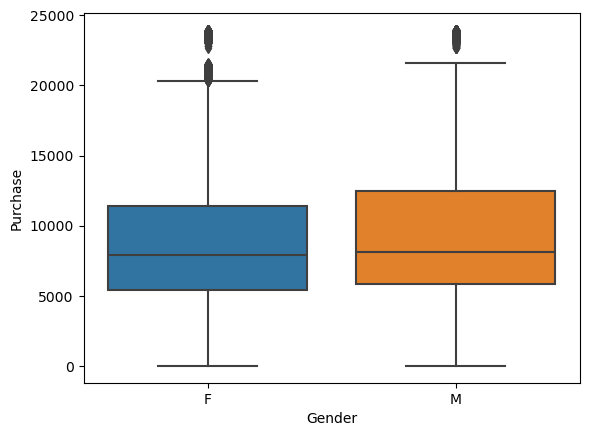

In [59]:
sns.boxplot(x='Gender', y ='Purchase', data =df)

<Axes: xlabel='Gender', ylabel='Purchase'>

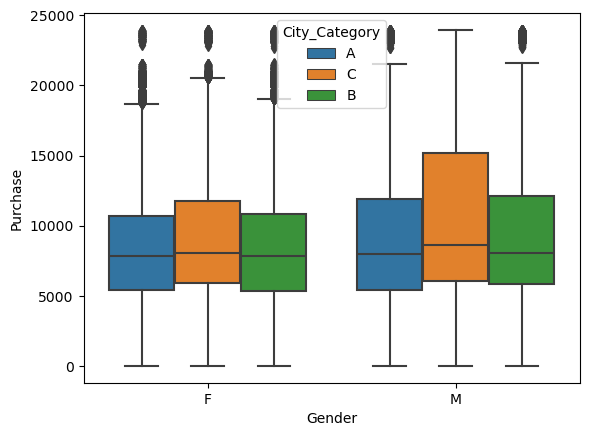

In [60]:
sns.boxplot(x='Gender', y ='Purchase', hue='City_Category', data =df)

In [61]:
female_purchases = df[df['Gender'] == 'F']['Purchase']
male_purchases = df[df['Gender'] == 'M']['Purchase']

# Calculate the average purchase amount for each gender
average_female_purchase = female_purchases.mean()
average_male_purchase = male_purchases.mean()

average_female_purchase, average_male_purchase

(8734.565765155476, 9437.526040472265)

In [62]:
average_male_purchase-average_female_purchase
#From the computed averages, it is evident that there is not a big significant difference in spending between male and female customers

702.9602753167892

In [63]:
import numpy as np
import scipy.stats as stats

# Sample data for female and male purchases
female_purchases = df[df['Gender'] == 'F']['Purchase']
male_purchases = df[df['Gender'] == 'M']['Purchase']

# Calculate the average purchase amount for each gender
average_female_purchase = female_purchases.mean()
average_male_purchase = male_purchases.mean()

# Calculate the standard deviation for each gender
female_std = np.std(female_purchases, ddof=1)
male_std = np.std(male_purchases, ddof=1)

# Sample sizes
n_female = len(female_purchases)
n_male = len(male_purchases)

# Confidence level
confidence_level = 0.90
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate standard errors
female_se = female_std / np.sqrt(n_female)
male_se = male_std / np.sqrt(n_male)

# Calculate margin of errors
female_me = z_score * female_se
male_me = z_score * male_se

# Calculate confidence intervals
female_ci = (average_female_purchase - female_me, average_female_purchase + female_me)
male_ci = (average_male_purchase - male_me, average_male_purchase + male_me)
#printing male and female confidance interval 
female_ci, male_ci


((8713.287834648021, 8755.84369566293), (9424.512497305488, 9450.539583639042))

In [64]:
import numpy as np
import scipy.stats as stats

# Sample data for female and male purchases
female_purchases = df[df['Gender'] == 'F']['Purchase']
male_purchases = df[df['Gender'] == 'M']['Purchase']

# Calculate the average purchase amount for each gender
average_female_purchase = female_purchases.mean()
average_male_purchase = male_purchases.mean()

# Calculate the standard deviation for each gender
female_std = np.std(female_purchases, ddof=1)
male_std = np.std(male_purchases, ddof=1)

# Sample sizes
n_female = len(female_purchases)
n_male = len(male_purchases)

# Confidence level
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate standard errors
female_se = female_std / np.sqrt(n_female)
male_se = male_std / np.sqrt(n_male)

# Calculate margin of errors
female_me = z_score * female_se
male_me = z_score * male_se

# Calculate confidence intervals
female_ci = (average_female_purchase - female_me, average_female_purchase + female_me)
male_ci = (average_male_purchase - male_me, average_male_purchase + male_me)
#printing male and female confidance interval 
female_ci, male_ci


((8709.21154714068, 8759.919983170272), (9422.01944736257, 9453.032633581959))

In [65]:
import numpy as np
import scipy.stats as stats

# Sample data for female and male purchases
female_purchases = df[df['Gender'] == 'F']['Purchase']
male_purchases = df[df['Gender'] == 'M']['Purchase']

# Calculate the average purchase amount for each gender
average_female_purchase = female_purchases.mean()
average_male_purchase = male_purchases.mean()

# Calculate the standard deviation for each gender
female_std = np.std(female_purchases, ddof=1)
male_std = np.std(male_purchases, ddof=1)

# Sample sizes
n_female = len(female_purchases)
n_male = len(male_purchases)

# Confidence level
confidence_level = 0.99
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate standard errors
female_se = female_std / np.sqrt(n_female)
male_se = male_std / np.sqrt(n_male)

# Calculate margin of errors
female_me = z_score * female_se
male_me = z_score * male_se

# Calculate confidence intervals
female_ci = (average_female_purchase - female_me, average_female_purchase + female_me)
male_ci = (average_male_purchase - male_me, average_male_purchase + male_me)
#printing male and female confidance interval 
female_ci, male_ci


((8701.24467443839, 8767.88685587256), (9417.146922669479, 9457.90515827505))

In [66]:

# Step 2: Create Marital Status categories
df['Marital_Status_Category'] = df['Marital_Status'].apply(lambda x: 'Married' if x == 1 else 'Unmarried')

# Step 3: Analyze Purchase Behavior
purchase_summary = df.groupby(['Marital_Status_Category', 'Age'])['Purchase'].agg(['count', 'mean']).reset_index()

print(purchase_summary)



   Marital_Status_Category    Age   count         mean
0                  Married  18-25   21116  8994.509992
1                  Married  26-35   86291  9252.882410
2                  Married  36-45   43636  9223.098451
3                  Married  46-50   33011  9305.535821
4                  Married  51-55   27662  9518.735088
5                  Married    55+   13621  9218.510315
6                Unmarried   0-17   15102  8933.464640
7                Unmarried  18-25   78544  9216.752419
8                Unmarried  26-35  133296  9252.566484
9                Unmarried  36-45   66377  9402.515329
10               Unmarried  46-50   12690  8956.529551
11               Unmarried  51-55   10839  9575.827475
12               Unmarried    55+    7883  9539.774959


In [67]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Marital_Status_Category
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Unmarried
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Unmarried
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Unmarried
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Unmarried
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368,Married
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371,Unmarried
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137,Married
550066,1006038,P00375436,F,55+,1,C,2,0,20,365,Unmarried


In [68]:
df['Occupation']=df['Occupation'].astype('str')
df['Purchase']=df['Purchase'].astype('int')
df['Product_ID']=df['Product_ID'].astype('str')
df['Gender']=df['Gender'].astype('str')

C:\Users\nee2-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


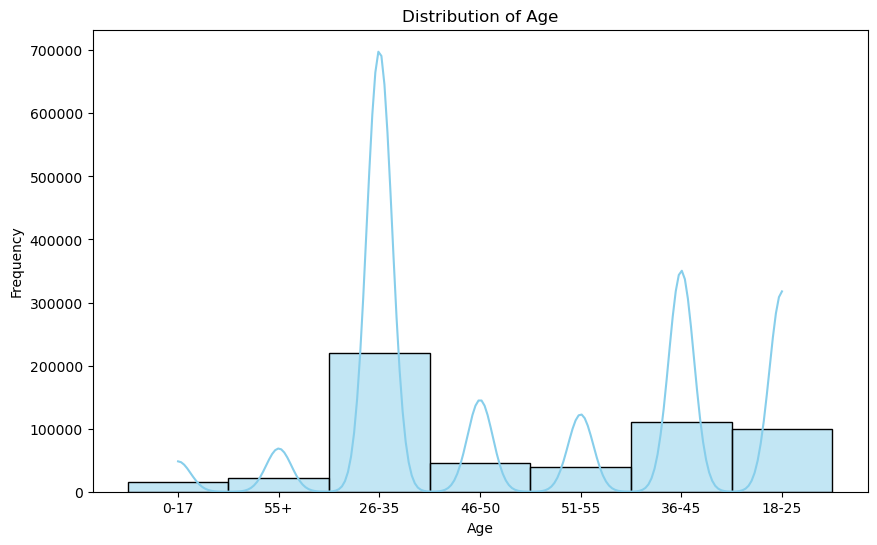

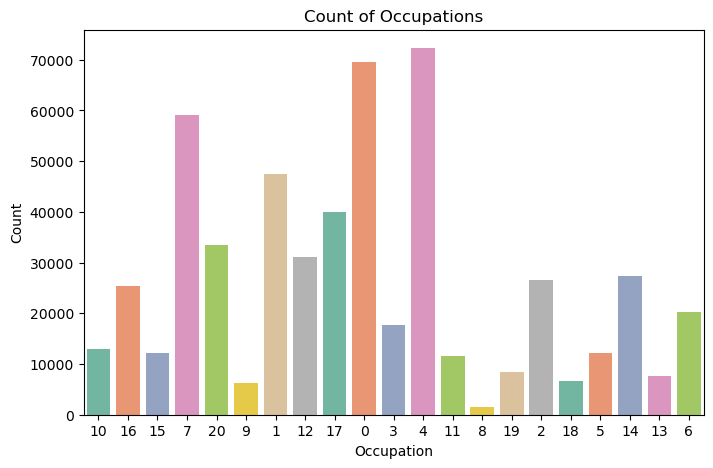

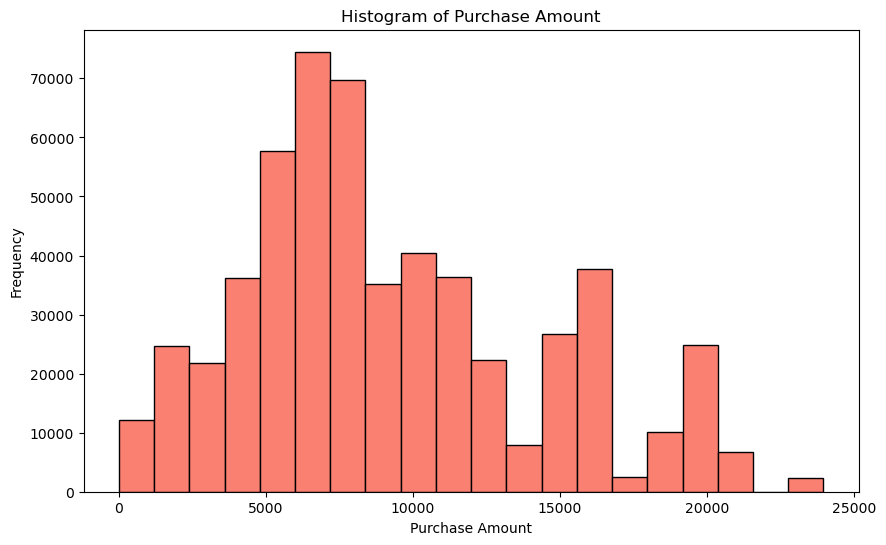

In [69]:
# Distplot for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Countplot for Occupation
plt.figure(figsize=(8, 5))
sns.countplot(x='Occupation', data=df, palette='Set2')
plt.title('Count of Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

# Histogram for Purchase amount
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase'], bins=20, edgecolor='black', color='salmon')
plt.title('Histogram of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


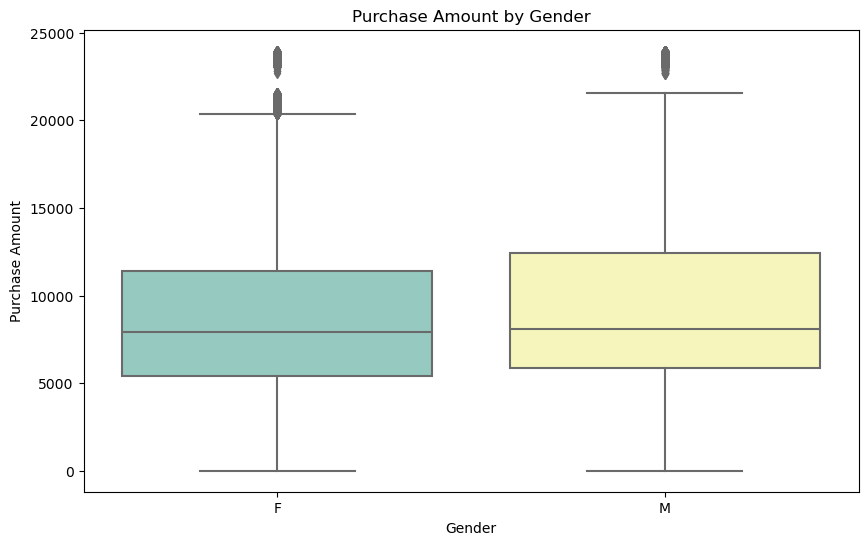

In [72]:
# Boxplot of Purchase amount by Gender
plt.figure(figsize=(10, 6))
sbn.boxplot(x='Gender', y='Purchase', data=df, palette='Set3')
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()





C:\Users\nee2-\AppData\Local\Temp\ipykernel_16260\4263383143.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'], bins=30, kde=False, rug=True)
C:\Users\nee2-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


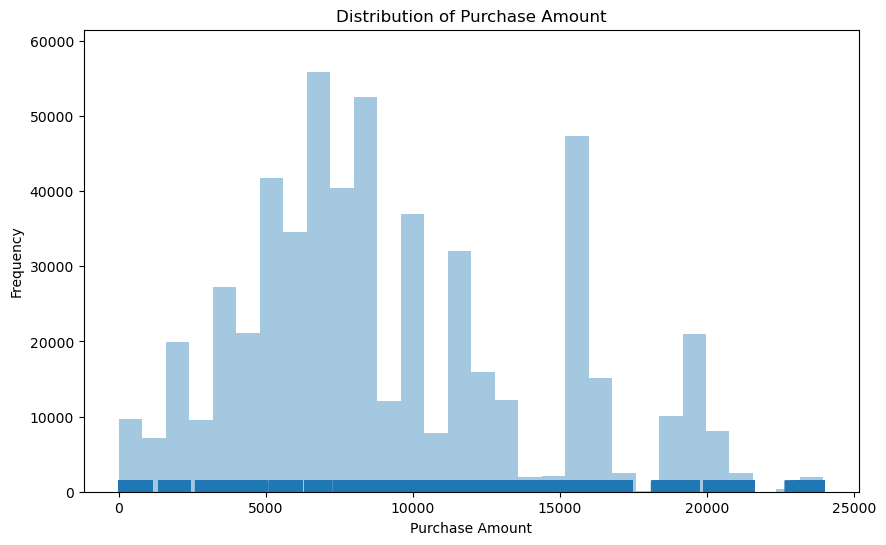

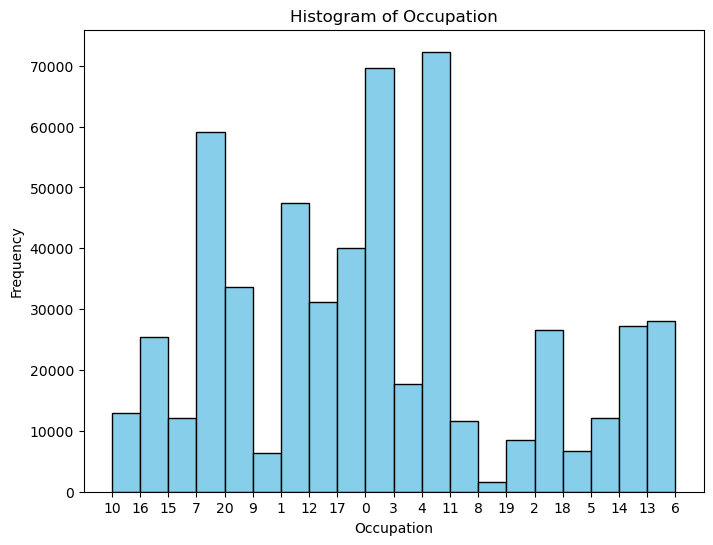

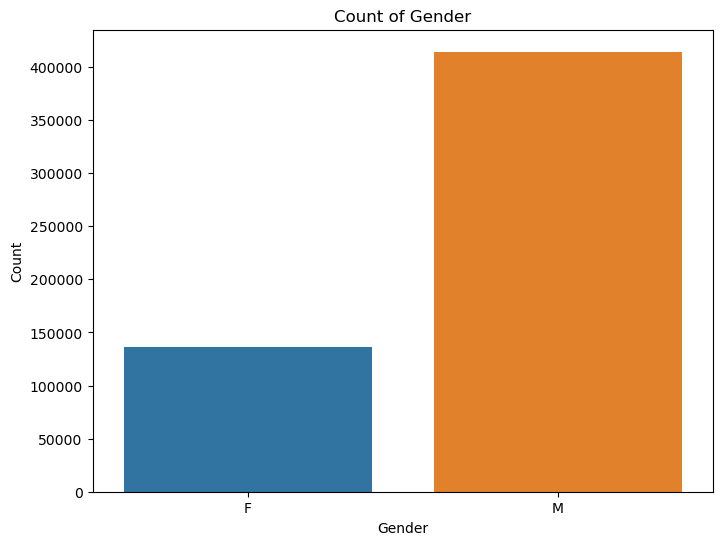

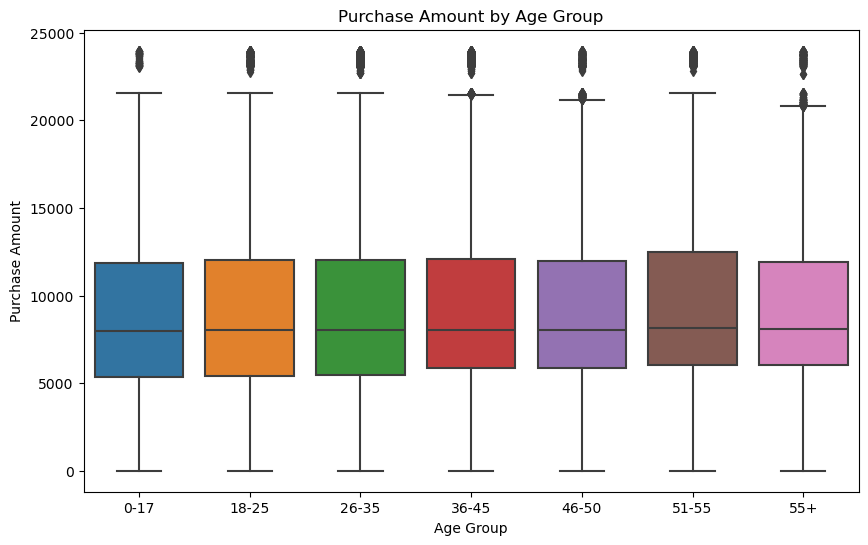

ValueError: could not convert string to float: '0-17'

<Figure size 1000x800 with 0 Axes>

In [71]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Purchase'], bins=30, kde=False, rug=True)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

# Histogram for 'Occupation' (assuming it's discrete)
plt.figure(figsize=(8, 6))
plt.hist(df['Occupation'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.show()

# Univariate Analysis - Categorical Variables
# Countplot for 'Gender'
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Boxplot for 'Age'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Purchase', data=df, order=['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
plt.title('Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Amount')
plt.show()


In [73]:
#Are Women Spending More Money Per Transaction Than Men?
# Calculate average spending by gender
avg_spending_gender = df.groupby('Gender')['Purchase'].mean()
print(avg_spending_gender)


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64


In [74]:
#Confidence Intervals and Distribution of the Mean of the Expenses by Female and Male Customers
import numpy as np
import scipy.stats as stats

# Calculate mean and standard error for each gender
mean_female = df[df['Gender'] == 'F']['Purchase'].mean()
mean_male = df[df['Gender'] == 'M']['Purchase'].mean()
se_female = df[df['Gender'] == 'F']['Purchase'].std() / np.sqrt(len(df[df['Gender'] == 'F']))
se_male = df[df['Gender'] == 'M']['Purchase'].std() / np.sqrt(len(df[df['Gender'] == 'M']))

# Calculate 95% confidence intervals
ci_female = stats.norm.interval(0.95, loc=mean_female, scale=se_female)
ci_male = stats.norm.interval(0.95, loc=mean_male, scale=se_male)

print(f"95% CI for female spending: {ci_female}")
print(f"95% CI for male spending: {ci_male}")


95% CI for female spending: (8709.21154714068, 8759.919983170272)
95% CI for male spending: (9422.01944736257, 9453.032633581959)


In [75]:
#Are Confidence Intervals of Average Male and Female Spending Overlapping?
# Check if confidence intervals overlap
ci_overlap = (ci_female[0] <= ci_male[1]) and (ci_male[0] <= ci_female[1])
print(f"Do confidence intervals overlap? {ci_overlap}")


Do confidence intervals overlap? False


In [76]:
#Are Married Customers Spending More Per Transaction Than Unmarried Customers?
# Calculate average spending by marital status
avg_spending_marital_status = df.groupby('Marital_Status')['Purchase'].mean()
print(avg_spending_marital_status)


Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64


In [77]:
#Are Certain Age Groups Spending More Per Transaction?
# Calculate average spending by age group
avg_spending_age = df.groupby('Age')['Purchase'].mean()
print(avg_spending_age)


Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64
